### Basic QC for non-human primate samples (Gideon)

#### Objective: Run basic QC for week 4 BAL samples in non-human primates from Gideon et al 2021

> Workflow based on following tutorial [https://www.youtube.com/watch?v=uvyG9yLuNSE]

- **Developed by**:  Mairi McClean
- **Computational Health Centre - Helmholtz Munich**
- **Original_v221209**; **Modified_v230213**

In [1]:
# Sanity check
import os 
os.write(1, b"text\n")

text


5

### Load modules

In [2]:
# check that all modules required throughout the notebook are present here in one cell

import anndata
import logging
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sb
import matplotlib.pyplot as plt
import igraph as ig
from matplotlib import colors
from matplotlib import rcParams

### Log files and figure output settings

In [3]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

-----
anndata     0.8.0
scanpy      1.7.2
sinfo       0.3.1
-----
PIL                 9.4.0
anndata             0.8.0
appnope             0.1.3
asttokens           NA
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cffi                1.15.1
cloudpickle         2.2.1
colorama            0.4.6
comm                0.1.2
cycler              0.10.0
cython_runtime      NA
cytoolz             0.12.0
dask                2023.2.0
dateutil            2.8.2
debugpy             1.6.6
decorator           5.1.1
defusedxml          0.7.1
dunamai             1.15.0
executing           1.2.0
get_version         3.5.4
google              NA
h5py                3.8.0
hypergeom_ufunc     NA
igraph              0.10.4
invgauss_ufunc      NA
ipykernel           6.21.1
ipython_genutils    0.2.0
ipywidgets          8.0.4
jedi                0.18.2
jinja2              3.1.2
joblib              1.2.0
kiwisolver          1.4.4
legacy_api_wrap     0.0.0
leidenalg           0.9.1
llvmlite 

### Create AnnData object

In [4]:
adata = sc.read_10x_mtx('/Users/mairi.mcclean/data/gideon')
adata

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


AnnData object with n_obs × n_vars = 10006 × 24820
    var: 'gene_ids'

### Pre-processing

In [5]:
adata.var

,gene_ids
A2ML1,A2ML1
A3GALT2,A3GALT2
A4GALT,A4GALT
AAAS,AAAS
AACS,AACS
...,...
ZYG11A,ZYG11A
ZYG11B,ZYG11B
ZYX,ZYX
ZZEF1,ZZEF1


In [6]:
adata.obs

""
Array4_23118_TATTACCCCGCA
Array4_23118_CTCTTCCGCCTA
Array4_23118_CATGTCTCCTGC
Array4_23118_GTAACTCCCCGA
Array4_23118_CGCCGTCTGATC
...
Array6_24118_CGAATATTCCAA
Array6_24118_TCTTGATCGCCC
Array6_24118_CTACCCTGTCGT
Array6_24118_CGTCGGCATCCT


In [7]:
adata.X

<10006x24820 sparse matrix of type '<class 'numpy.float32'>'
	with 14222226 stored elements in Compressed Sparse Row format>

normalizing counts per cell
    finished (0:00:00)


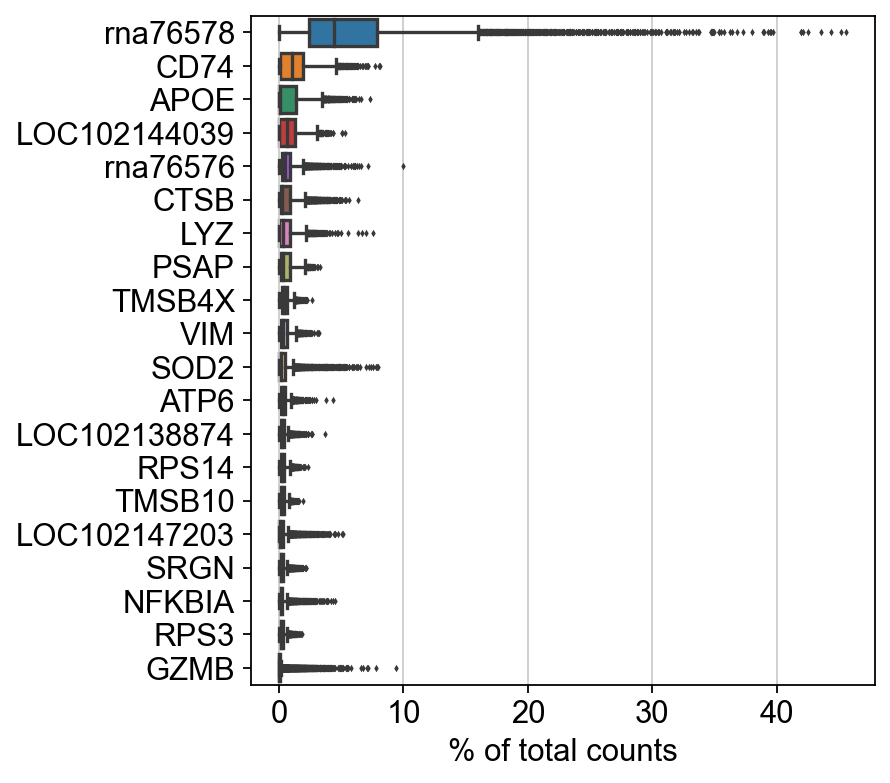

In [8]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [9]:
# Note: this step was added after mito and ribo gene steps, and the 'adata.var' changed significantly to include 'mean_counts, n_cells_by_counts, log1p_mean_counts, pct_dropout_by_counts, total_counts, and log1p_total_counts'
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 4878 genes that are detected in less than 3 cells


In [10]:
# Trying to find mitochondrial genes; not annotated with "mt" or "MT", therefore annotation will be manual
## str.startswith taken from scanpy pbmc tutorial
# Step 1: Annotate mitochondrial genes

adata.var['mito'] = adata.var_names.str.startswith('ATP8', 'ATP6')
adata.var['mito'] = adata.var_names.str.startswith('CO1', 'CO2')
adata.var['mito'] = adata.var_names.str.startswith('CO3', 'CYB')
adata.var['mito'] = adata.var_names.str.startswith('ND1', 'ND2')
adata.var['mito'] = adata.var_names.str.startswith('ND3', 'ND4L')
adata.var['mito'] = adata.var_names.str.startswith('ND4', 'ND5')
adata.var['mito'] = adata.var_names.str.startswith('ND6', 'RNR2')
adata.var['mito'] = adata.var_names.str.startswith('TA', 'TR')
adata.var['mito'] = adata.var_names.str.startswith('TN', 'TD')
adata.var['mito'] = adata.var_names.str.startswith('TC', 'TE')
adata.var['mito'] = adata.var_names.str.startswith('TQ', 'TG')
adata.var['mito'] = adata.var_names.str.startswith('TH', 'TI')
adata.var['mito'] = adata.var_names.str.startswith('TL1', 'TL2')
adata.var['mito'] = adata.var_names.str.startswith('TK', 'TM')
adata.var['mito'] = adata.var_names.str.startswith('TF', 'TP')
adata.var['mito'] = adata.var_names.str.startswith('TS1', 'TS2')
adata.var['mito'] = adata.var_names.str.startswith('TT', 'TW')
adata.var['mito'] = adata.var_names.str.startswith('TY', 'TV')
adata.var['mito'] = adata.var_names.str.startswith('RNR1')


In [11]:
adata.var

,gene_ids,n_cells,mito
A2ML1,A2ML1,7,False
A3GALT2,A3GALT2,7,False
A4GALT,A4GALT,709,False
AAAS,AAAS,364,False
AACS,AACS,720,False
...,...,...,...
ZXDC,ZXDC,440,False
ZYG11B,ZYG11B,315,False
ZYX,ZYX,1930,False
ZZEF1,ZZEF1,605,False


In [12]:
# Same for ribo genes

ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"

In [13]:
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [14]:
# Make a new column in the .var object called "ribo"
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)

In [15]:
adata.var


,gene_ids,n_cells,mito,ribo
A2ML1,A2ML1,7,False,False
A3GALT2,A3GALT2,7,False,False
A4GALT,A4GALT,709,False,False
AAAS,AAAS,364,False,False
AACS,AACS,720,False,False
...,...,...,...,...
ZXDC,ZXDC,440,False,False
ZYG11B,ZYG11B,315,False,False
ZYX,ZYX,1930,False,False
ZZEF1,ZZEF1,605,False,False


In [16]:
# See comment previous cell: "# Note: this step was added after mito and ribo gene steps, and the 'adata.var' changed significantly to include 'mean_counts, n_cells_by_counts, 
# log1p_mean_counts, pct_dropout_by_counts, total_counts, and log1p_total_counts'"
 

adata.obs

,n_genes
Array4_23118_TATTACCCCGCA,4583
Array4_23118_CTCTTCCGCCTA,4321
Array4_23118_CATGTCTCCTGC,4839
Array4_23118_GTAACTCCCCGA,3922
Array4_23118_CGCCGTCTGATC,4017
...,...
Array6_24118_CGAATATTCCAA,337
Array6_24118_TCTTGATCGCCC,354
Array6_24118_CTACCCTGTCGT,331
Array6_24118_CGTCGGCATCCT,323


###### Why is the obs just 1 column?

In [17]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mito', 'ribo'], percent_top=None, inplace=True)
adata.obs

,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,total_counts_mito,log1p_total_counts_mito,pct_counts_mito,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo
Array4_23118_TATTACCCCGCA,4583,4583,8.430327,16699.0,9.723164,0.0,0.0,0.0,304.0,5.720312,1.820468
Array4_23118_CTCTTCCGCCTA,4321,4320,8.371242,15943.0,9.676838,0.0,0.0,0.0,255.0,5.545177,1.599448
Array4_23118_CATGTCTCCTGC,4839,4829,8.482602,14969.0,9.613804,0.0,0.0,0.0,353.0,5.869297,2.358207
Array4_23118_GTAACTCCCCGA,3922,3921,8.274357,12294.0,9.416948,0.0,0.0,0.0,219.0,5.393628,1.781357
Array4_23118_CGCCGTCTGATC,4017,4015,8.298042,12396.0,9.425210,0.0,0.0,0.0,183.0,5.214936,1.476283
...,...,...,...,...,...,...,...,...,...,...,...
Array6_24118_CGAATATTCCAA,337,337,5.823046,525.0,6.265301,0.0,0.0,0.0,28.0,3.367296,5.333333
Array6_24118_TCTTGATCGCCC,354,354,5.872118,511.0,6.238325,0.0,0.0,0.0,12.0,2.564949,2.348337
Array6_24118_CTACCCTGTCGT,331,331,5.805135,513.0,6.242223,0.0,0.0,0.0,8.0,2.197225,1.559454
Array6_24118_CGTCGGCATCCT,323,323,5.780744,509.0,6.234411,0.0,0.0,0.0,12.0,2.564949,2.357564


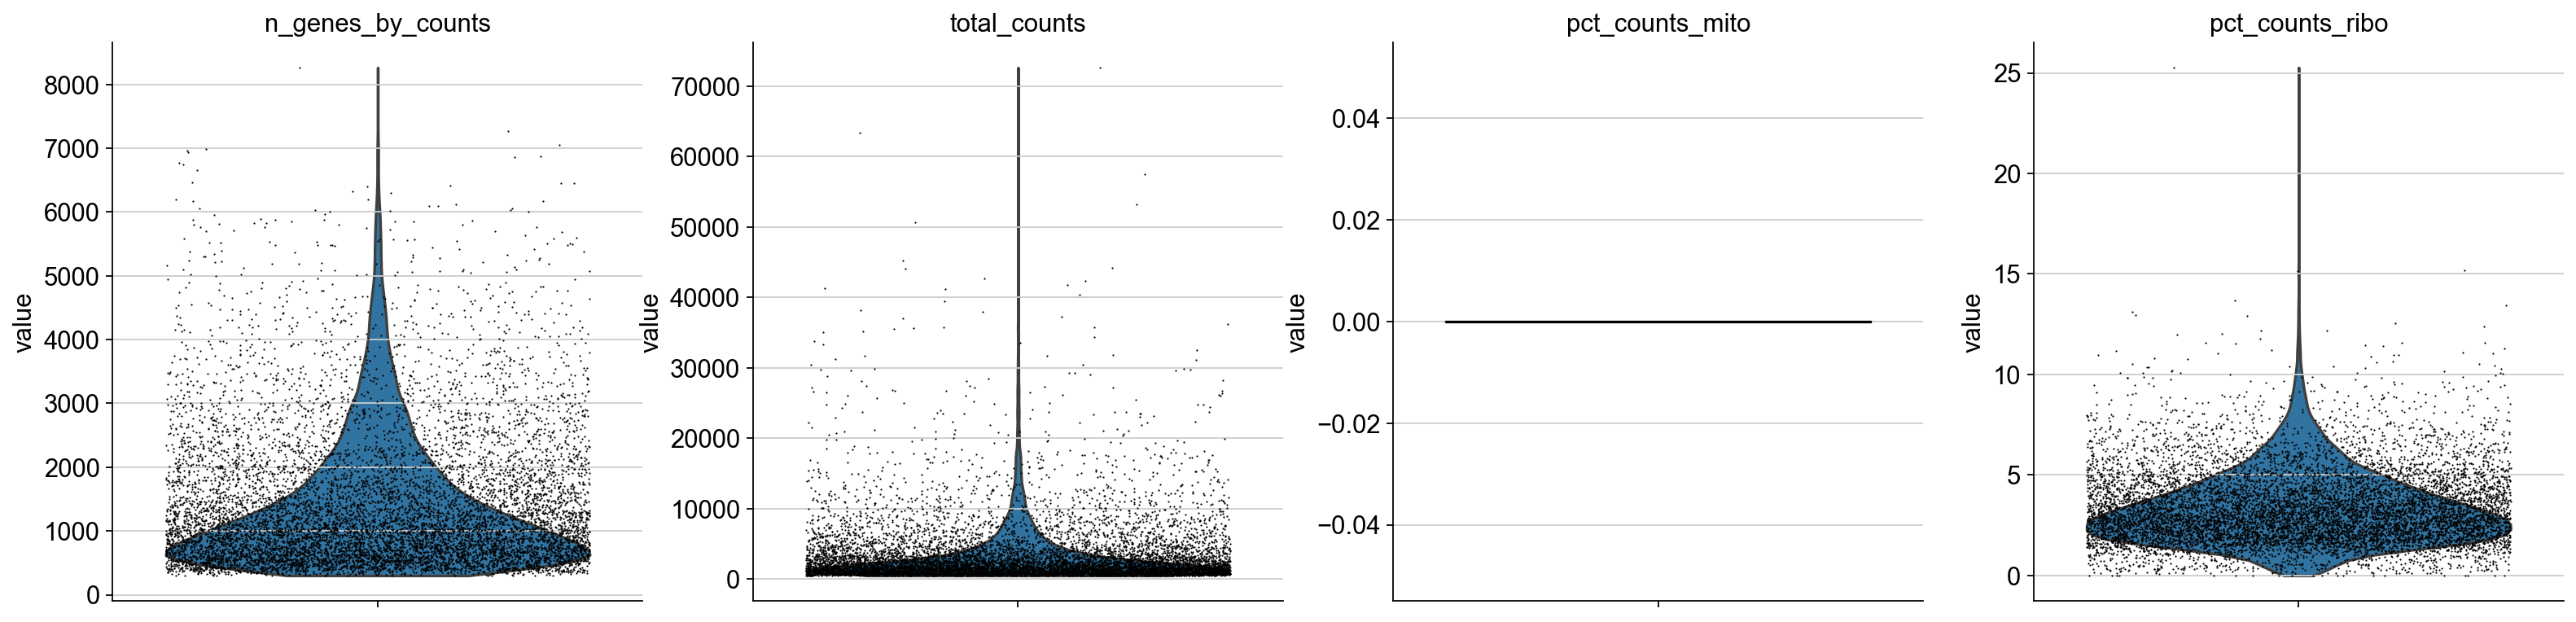

In [18]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mito', 'pct_counts_ribo'], 
             jitter=0.4, multi_panel=True)